In [1]:
# Bayesian probabilistic linear model of Dissolved Oxygen
# Rio Paraiba do Sul river
import pymc3 as pm
import numpy as np
import os
import pandas as pd
import arviz as az

print(f"Running on PyMC3 v{pm.__version__}")
RANDOM_SEED = 58

Running on PyMC3 v3.8


In [2]:
# load data from CSV file
DATA_DIR = "C:\\Users\DELL\Documents\Fernando" 
planilha = os.path.join(DATA_DIR, "Rio_Paraiba_do_Sul_cal.csv") #conjunto de calibracao

df = pd.read_csv(planilha, sep=";", decimal=",", header=0)

df.columns

Index(['Unnamed: 0', 'Vaz', 'Temp', 'pH', 'DBO', 'Cond', 'NH3', 'NO3', 'NO2',
       'Fosf', 'Turb', 'SDT', 'OD'],
      dtype='object')

In [3]:
#output calibration
dOD = df['OD']
#calibration set
df2= pd.DataFrame(df, columns=['Vaz', 'Temp', 'pH', 'DBO', 'Cond', 'NH3', 'NO3', 'NO2', 'Fosf', 'Turb', 'SDT'])

#validation/prediction set
planilha2 = os.path.join(DATA_DIR, "Rio_Paraiba_do_Sul_val.csv")

df3 = pd.read_csv(planilha2, sep=";", decimal=",", header=0)
df4= pd.DataFrame(df3, columns=['Vaz', 'Temp', 'pH', 'DBO', 'Cond', 'NH3', 'NO3', 'NO2', 'Fosf', 'Turb', 'SDT'])


In [4]:
#Probabilistic linear model building
with pm.Model() as model:
    a = pm.Normal('a', mu=dOD.mean(), sd=2)
    bA = pm.Normal('bA', mu=0, sd=2, shape=11) # shape = No de bA's
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    X = pm.Data('X', df2)
    mu = pm.Deterministic('mu', a + pm.math.dot(X, bA))
   
    OD = pm.Normal('OD', mu=mu, sd=sigma, observed=dOD)
    trace = pm.sample(2000, tune=2000, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bA, a]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 8000/8000 [00:13<00:00, 585.12draws/s]


In [6]:
varnames = ['a', 'bA', 'sigma']
pm.summary(trace, varnames) #Visualization of all parameters

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,4.708,0.089,4.542,4.874,0.001,0.001,7273.0,7229.0,7354.0,2774.0,1.0
bA[0],-0.013,0.103,-0.213,0.170,0.001,0.002,5090.0,2062.0,5101.0,3062.0,1.0
bA[1],-0.382,0.106,-0.577,-0.175,0.001,0.001,6143.0,5520.0,6176.0,2907.0,1.0
bA[2],0.242,0.095,0.058,0.420,0.001,0.001,6294.0,5184.0,6285.0,3017.0,1.0
bA[3],0.188,0.096,0.016,0.373,0.001,0.001,5303.0,4560.0,5295.0,3060.0,1.0
bA[4],-0.692,0.127,-0.931,-0.453,0.002,0.001,4233.0,4160.0,4228.0,3391.0,1.0
bA[5],0.143,0.109,-0.065,0.350,0.002,0.001,4875.0,3832.0,4896.0,3310.0,1.0
bA[6],-0.214,0.104,-0.405,-0.020,0.001,0.001,5496.0,5088.0,5485.0,2976.0,1.0
bA[7],0.090,0.091,-0.075,0.268,0.001,0.001,6038.0,3519.0,6042.0,3103.0,1.0
bA[8],-0.239,0.093,-0.408,-0.060,0.001,0.001,7181.0,5862.0,7134.0,3135.0,1.0


C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_

C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_

C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_

C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B35AB4F70>,
      dtype=object)

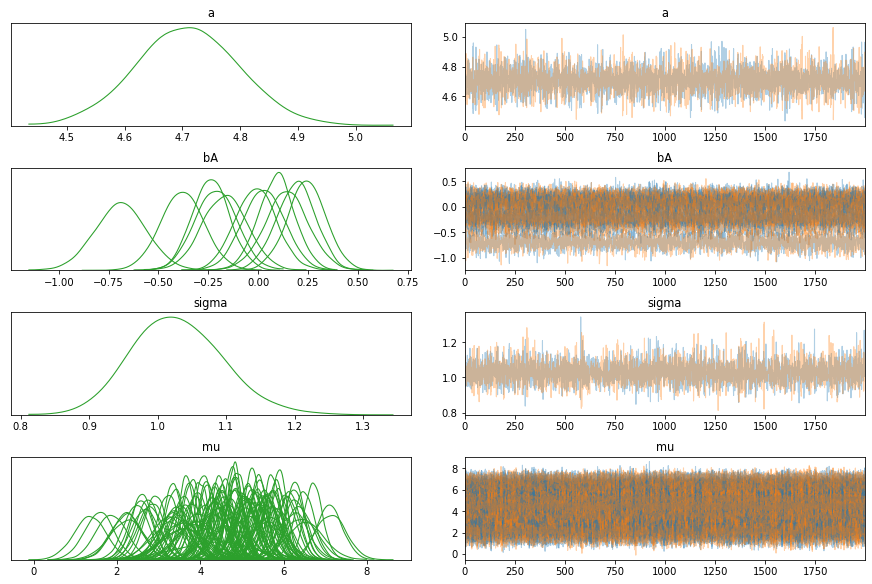

In [7]:
pm.plot_trace(trace, compact = True, combined = True) #graphical Visualization of PDFs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B34D8C1C0>],
      dtype=object)

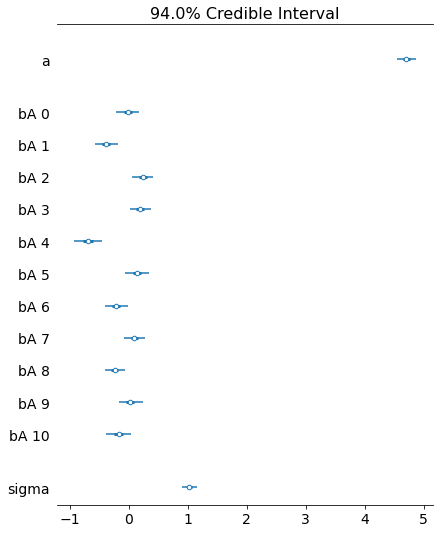

In [8]:
az.plot_forest(trace, kind='forestplot', var_names=varnames, combined=True)
#graphical Visualization of parameters

In [9]:
# Estimated calibration values
OD_cal = pm.sample_posterior_predictive(trace, samples=2000, model=model)['OD']

C:\anaconda3\envs\PyMC\lib\site-packages\pymc3\sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 562.42it/s]


In [10]:
# Save the DO calibration results as text file
np.savetxt('OD_cal.txt', OD_cal.mean(0), delimiter=' ', newline='\n')

In [11]:
# Estimated prediction values - 20 prediction samples
with model:
     pm.set_data({'X': pd.DataFrame(df4, index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])})
     OD_test = pm.sample_posterior_predictive(trace, model=model, random_seed=RANDOM_SEED)['OD']        

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:13<00:00, 292.36it/s]


In [12]:
# Save the DO prediction results as text file
np.savetxt('OD_test.txt', OD_test.mean(axis=0), delimiter=' ', newline='\n')